In [4]:
# Unit 5/Assignment - The Power of Plots
## Option 1: Pyber

In [5]:

%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"



In [6]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_df = pd.merge(ride_data_df, city_data_df, how="left", on="city")

# Display the data table for preview
city_ride_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [34]:
city_group = city_ride_df.groupby("city")

# Average fare per city
average_fare = city_group["fare"].mean()

# Total number of rides per city
total_rides = city_ride_df["city"].value_counts()

# Total number of drivers per city
driver_count = city_group.mean()["driver_count"]

# City type (Urban, Suburban, Rural)
city_type = city_data_df.set_index('city')['type']

bubble_dict={"Total rides per city":total_rides,
      "Average fare per city":average_fare,
       "Total number of drivers per city":driver_count,
       "City type":city_type}
bubble_df=pd.DataFrame(bubble_dict)
bubble_df.head()

bubble_df.sort_values('Total number of drivers per city', ascending = False)




,Total rides per city,Average fare per city,Total number of drivers per city,City type
West Samuelburgh,25,21.767600,73.0,Urban
South Michelleport,31,24.451613,72.0,Urban
West Anthony,30,24.736667,70.0,Urban
Liumouth,33,26.150000,69.0,Urban
Port Angela,19,23.836842,67.0,Urban
Reynoldsfurt,19,21.919474,67.0,Urban
East Kaylahaven,29,23.757931,65.0,Urban
Royland,30,20.570667,64.0,Urban
Jerryton,25,25.649200,64.0,Urban
Grahamburgh,25,25.221200,61.0,Urban


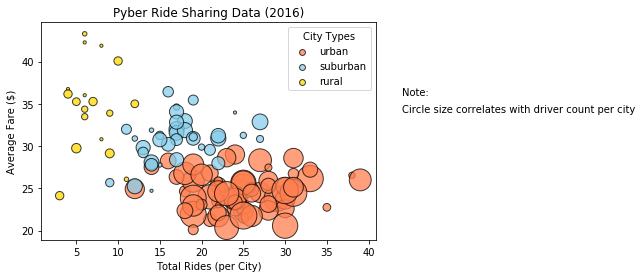

In [32]:
# Obtain the x and y coordinates for each of the three city types
urban = bubble_df.loc[bubble_df["City type"] == "Urban"]
rural = bubble_df.loc[bubble_df["City type"] == "Rural"]
suburban = bubble_df.loc[bubble_df["City type"] == "Suburban"]

# X Values
urban_ride = urban["Total rides per city"]
rural_ride= rural["Total rides per city"]
suburban_ride = suburban["Total rides per city"]
# Y values
urban_fare = urban["Average fare per city"]
rural_fare = rural["Average fare per city"]
suburban_fare = suburban["Average fare per city"]
# S values (bubble size)
urban_driver = urban["Total number of drivers per city"]
rural_driver = rural["Total number of drivers per city"]
suburban_driver = suburban["Total number of drivers per city"]

# Build the scatter plots for each city types
plt.scatter(urban_ride, urban_fare, s=urban_driver*10, marker="o", 
                       facecolors="Coral",edgecolors="black",  alpha=.75, label="urban")
plt.scatter(suburban_ride, suburban_fare, s=suburban_driver*10, marker="o", 
                          facecolors="SkyBlue", edgecolors="black", alpha=.75, label="suburban")
plt.scatter(rural_ride, rural_fare, s=rural_driver*10, marker="o", 
                       facecolors="Gold", edgecolors="black", alpha=.75, label="rural")

            
# Create title,xlabel and ylabel
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Rides (per City)")
plt.ylabel("Average Fare ($)")

plt.axis('auto')

# Create a legend
leg=plt.legend(title="City Types", scatterpoints=1)
leg.legendHandles[0]._sizes=[35]
leg.legendHandles[1]._sizes=[35]
leg.legendHandles[2]._sizes=[35]


# Incorporate a text label regarding circle size
plt.text(44, 36, "Note:")
plt.text(44, 34 ,"Circle size correlates with driver count per city")

# Save Figure
plt.savefig("bubble.png")
plt.show()

## Total Fares by City Type

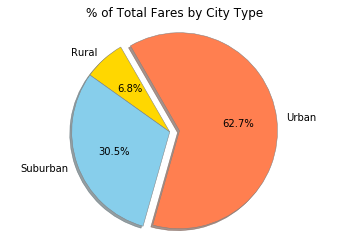

In [33]:

# Group types
type_data = city_ride_df.groupby("type")["type", "fare", "ride_id", "driver_count"]
# % of total fares by city type
fare_percent = type_data.sum()["fare"]

# Build pie chart
labels = fare_percent.index
colors = ["Gold","SkyBlue","Coral"]
explode = [0 , 0, .1]
plt.pie(fare_percent, startangle=120, colors=colors, explode=explode, labels=labels, labeldistance=1.1, autopct="%1.1f%%", shadow=True, wedgeprops={'linewidth': 0.5, 'edgecolor': 'grey'})

# Formatting
plt.axis("equal")
plt.title("% of Total Fares by City Type")


# Save Figure
plt.savefig("fares_by_city_type.png")
plt.show()


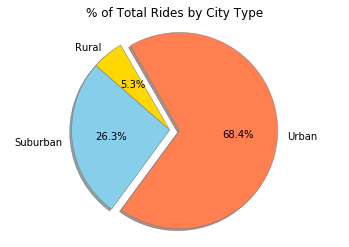

In [26]:
# Calculate Ride Percents

ride_percent = type_data.count()["ride_id"]

# Build Pie Chart

labels = ride_percent.index
plt.pie(ride_percent, startangle=120, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, wedgeprops={'linewidth': .5, 'edgecolor': 'grey'})

plt.title("% of Total Rides by City Type")
plt.axis('equal')

# Save Figure
plt.savefig("rides_by_city_type.png")
plt.show()


## Total Drivers by City Type

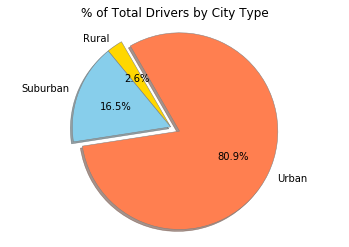

In [27]:
# Calculate Driver Percents
driver_percent = city_data_df.groupby("type").sum()["driver_count"]

# Build Pie Charts
labels = driver_percent.index
plt.pie(driver_percent, startangle=120, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, wedgeprops={'linewidth': 0.5, 'edgecolor': 'grey'})

plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("drivers_by_city_type.png")
plt.show()



In [ ]:
### written description of observable trends based on the data.
# As we see the data, rural area have fewer driver and rider.
# Urban area is generated more than 2/3rd of revenue. 

